In [3]:
import gensim.downloader
import numpy as np

In [4]:
glove = gensim.downloader.load('glove-twitter-25')
w2v = gensim.downloader.load('word2vec-google-news-300')

In [5]:
print(np.linalg.norm(glove['the']))
print(np.linalg.norm(glove['hypothesis']))
print(np.linalg.norm(glove['in']))
print(np.linalg.norm(glove['ambiguity']))
print(np.linalg.norm(glove['or']))

6.8252115
3.3557737
6.5615573
4.5202594
5.700421


In [6]:
print(np.linalg.norm(w2v['the']))
print(np.linalg.norm(w2v['hypothesis']))
print(np.linalg.norm(w2v['in']))
print(np.linalg.norm(w2v['ambiguity']))
print(np.linalg.norm(w2v['or']))

1.0722071
3.4770265
1.3277475
3.0763721
1.6684263


In [7]:
print(np.linalg.norm(glove['fast'] - glove['the']))
print(glove['not'])

4.4263735
[ 0.35377   0.32604  -0.22682  -0.32412  -0.18555   0.1486    1.3914
 -0.65154  -0.38197   0.17129  -0.43405   0.39154  -5.7918   -0.20201
 -0.23216  -0.10638   0.070835 -0.2146   -0.094385 -1.0851    0.61683
  0.82184  -0.35102   0.19177  -0.43818 ]


In [8]:
import pandas as pd

coca = pd.read_csv('../../data/coca_freq.csv')
print(coca)

         lemma      freq
0          the  50033612
1           be  32394756
2          and  24778098
3            a  24225478
4           of  23159162
...        ...       ...
5045  keyboard     11885
5046   persist     11880
5047     wheat     11877
5048  predator     11876
5049   bizarre     11875

[5050 rows x 2 columns]


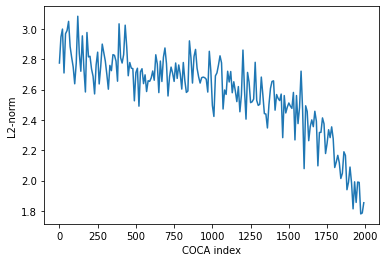

In [35]:
import matplotlib.pyplot as plt

infos = list()
coca_reversed = coca.head(2000).iloc[::-1]
for index, row in coca_reversed.iterrows():
    try:
        lemma = row['lemma']
        infos.append(np.linalg.norm(w2v[lemma]))
    except KeyError:
        continue

avg_infos = list()
for i in range(0, len(infos), 10):
    subinfos = infos[i:(i+10)]
    avg_infos.append(sum(subinfos)/len(subinfos))

fig = plt.figure()
plt.plot(range(0, len(infos), 10), avg_infos)
plt.xlabel('COCA index')
plt.ylabel('L2-norm')
plt.gcf().set_facecolor('white')
plt.show()
fig.savefig('./coca_info.png')